# IMDb Movie Ratings Scrape

By: Brandon Adame Gachuz

This notebook makes use of: requests, pandas, BeautifulSoup, and Matplotlib libraries.

In [2]:
from requests import get

In [3]:
url = 'https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=2&ref_=adv_nxt'
response = get(url)

In [4]:
print(response.text[:600])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"


In [5]:
from bs4 import BeautifulSoup

In [6]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [7]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [8]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt5439796"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt5439796/?ref_=adv_li_i"> <img alt="Logan Lucky" class="loadlate" data-tconst="tt5439796" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMTYyODg0NDU1OV5BMl5BanBnXkFtZTgwNjcxMzU0MjI@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">51.</span>
<a href="/title/tt5439796/?ref_=adv_li_tt">Logan Lucky</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">PG-13</span>
<span class="ghost">|</span>
<span class="runtime">118 min</span>
<span class="ghost">|</span>
<span cla

In [9]:
# Accessing first 'div' tag doesn't help
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt5439796"></div>
</div>

In [10]:
# Gets us closer to the title
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">51.</span>
<a href="/title/tt5439796/?ref_=adv_li_tt">Logan Lucky</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [11]:
# Gets us to the movie title
first_movie.h3.a

<a href="/title/tt5439796/?ref_=adv_li_tt">Logan Lucky</a>

In [12]:
# Accessing the title text
first_movie.h3.a.text

'Logan Lucky'

In [13]:
# Accessing the 'year' to the first movie
first_year = first_movie.h3.find('span', class_ = "lister-item-year text-muted unbold")
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [14]:
first_year = first_year.text
first_year

'(2017)'

In [15]:
# accessing movie rating
first_movie.strong

<strong>7.0</strong>

In [16]:
# first movie rating
first_imdb = float(first_movie.strong.text)
first_imdb

7.0

In [17]:
# accessing the metascore for the first movie
# the class in 'inspect element' has two whitespaces, but one was removed. Otherwise 'find()' won't find anything
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

78


In [18]:
# first movie votes
first_votes = first_movie.find('span', attrs={'name': 'nv'})
first_votes

<span data-value="93434" name="nv">93,434</span>

In [19]:
first_votes['data-value']

'93434'

In [20]:
first_votes = int(first_votes['data-value'])

In [21]:
# finding movie without metascore
# at the time of this, 'Taboo' doesn't have a metascore
second_movie_mscore = movie_containers[1].find('div', class_ = {'ratings-metascore'})
type(second_movie_mscore)

NoneType

In [22]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extract data from individual movie container
for container in movie_containers:
    
    # If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        
        # The name
        name = container.h3.a.text
        names.append(name)
        
        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # The metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(m_score)
        
        # The number of votes
        vote = container.find('span', attrs={'name': 'nv'})['data-value']
        votes.append(int(vote))
        

In [23]:
import pandas as pd

In [24]:
test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
imdb         35 non-null float64
metascore    35 non-null object
movie        35 non-null object
votes        35 non-null int64
year         35 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ KB
None


,imdb,metascore,movie,votes,year
0,7.0,78,Logan Lucky,93434,(2017)
1,7.2,83,The Post,87982,(2017)
2,8.0,66,Wonder,87933,(I) (2017)
3,7.2,67,T2 Trainspotting,86070,(2017)
4,6.0,44,Power Rangers,85670,(2017)
5,6.3,50,The Boss Baby,84228,(2017)
6,7.5,71,Molly's Game,81900,(2017)
7,6.3,49,Despicable Me 3,80091,(2017)
8,6.5,62,Annabelle: Creation,77667,(2017)
9,4.6,33,Fifty Shades Darker,74951,(2017)


# The script for multiple pages

Scraping multiple pages is a bit more challenging. We'll build upon our one-page script by doing three more things:

1. Making all the requests we want from within the loop.
2. Controlling the loop's rate to avoid bombarding the server with requests.
3. Monitoring the loop while it runs.

### Changing the URL's Parameter

'https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=2&ref_=adv_nxt'

As we are making the requests, we'll only have to vary the values of only two parameters of the URL: the release_date parameter, and page. Let's prepare the values we'll need for the forthcoming loop. In the next code cell we will:

* Create a list called pages, and populate it with the strings corresponding to the first 4 pages.
* Create a list called years_url and populate it with the strings corresponding to the years 2000-2017.

In [25]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

### Controlling Crawl Rate

Controlling the rate of crawling is beneficial for us, and for the website we are scraping. If we avoid hammering the server with tens of requests per second, then we are much less likely to get our IP address banned. We also avoid disrupting the activity of the website we scrape by allowing the server to respond to other users' requests too.

We'll control the loop's rate by using the sleep() function from Python's time module. sleep() will pause the execution of the loop for a specified amount of seconds.

To mimic human behavior, we'll vary the amount of waiting time between requests by using the randint() function from the Python's random module. randint() randomly generates integers within a specified interval.

In [26]:
from time import sleep
from random import randint

### Monitoring the loop as it's still going

Given that we're scraping 72 pages, it would be nice if we could find a way to monitor the scraping process as it's still going. This feature is definitely optional, but it can be very helpful in the testing and debugging process. Also, the greater the number of pages, the more helpful the monitoring becomes. If you are going to scrape hundreds or thousands of web pages in a single code run, I would say that this feature becomes a must.

For our script, we'll make use of this feature, and monitor the following parameters:

* The frequency (speed) of requests, so we make sure our program is not overloading the server.
* The number of requests, so we can halt the loop in case the number of expected requests is exceeded.
* The status code of our requests, so we make sure the server is sending back the proper responses.

Since we're going to make 72 requests, our work will look a bit untidy as the output accumulates. To avoid that, we'll clear the output after each iteration, and replace it with information about the most recent request.

In [27]:
from time import time
from IPython.core.display import clear_output

In [28]:
start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Requests: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Requests: 5; Frequency: 0.49862321491799155 requests/s


### Monitor status code

In [29]:
from warnings import warn

In [30]:
# warn("Warning Simulation")

In [31]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

## Piecing everything together

In [32]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:
    
    # For every page in the interval 1-4
    for page in pages:
        
        # Make the 'GET' request
        response = get('http://www.imdb.com/search/title?release_date' + year_url + '&sort=num_votes,desc&page' + 
                      page, headers = headers)
        
        # Pause the loop
        sleep(randint(8,15))
        
        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Requests: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait=True)
        
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
            
        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected')
            break
            
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
        
        # For every movie of these 50
        for container in mv_containers:
            # if the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:
                
                # scrape the name
                name = container.h3.a.text
                names.append(name)
                
                # scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)
                
                # scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)
                
                # scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))
                
                # scrape the number of votes
                vote = container.find('span', attrs={'name': 'nv'})['data-value']
                votes.append(int(vote))

Requests: 72; Frequency: 0.0758127272668816 requests/s


# Analyzing the data using pandas

In [33]:
# Creating DataFrame object with scraped data
movie_ratings = pd.DataFrame({'movie': names,
                             'year': years,
                             'imdb': imdb_ratings,
                             'metascore': metascores,
                             'votes': votes})

In [34]:
print(movie_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 5 columns):
imdb         3456 non-null float64
metascore    3456 non-null int64
movie        3456 non-null object
votes        3456 non-null int64
year         3456 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 135.1+ KB
None


In [35]:
movie_ratings.head(10)

,imdb,metascore,movie,votes,year
0,9.3,80,The Shawshank Redemption,1996917,(1994)
1,9.0,84,The Dark Knight,1966522,(2008)
2,8.8,74,Inception,1747479,(2010)
3,8.8,66,Fight Club,1598659,(1999)
4,8.9,94,Pulp Fiction,1559476,(1994)
5,8.8,82,Forrest Gump,1519618,(1994)
6,8.8,92,The Lord of the Rings: The Fellowship of the Ring,1439247,(2001)
7,8.7,73,The Matrix,1433108,(1999)
8,8.9,94,The Lord of the Rings: The Return of the King,1422284,(2003)
9,9.2,100,The Godfather,1367898,(1972)


In [36]:
type(movie_ratings)

pandas.core.frame.DataFrame

In [37]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,The Shawshank Redemption,(1994),9.3,80,1996917
1,The Dark Knight,(2008),9.0,84,1966522
2,Inception,(2010),8.8,74,1747479
3,Fight Club,(1999),8.8,66,1598659
4,Pulp Fiction,(1994),8.9,94,1559476


In [38]:
movie_ratings['year'].unique()

array(['(1994)', '(2008)', '(2010)', '(1999)', '(2001)', '(2003)',
       '(1972)', '(2012)', '(2002)', '(1995)', '(2014)', '(2000)',
       '(2005)', '(1977)', '(1991)', '(2009)', '(1998)', '(1993)',
       '(2006)', '(1980)', '(2013)', '(1974)', '(1997)', '(1985)',
       '(1990)', '(1983)'], dtype=object)

In [39]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [40]:
movie_ratings['year'].head()

0    1994
1    2008
2    2010
3    1999
4    1994
Name: year, dtype: int64

In [41]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,7.8,58.0
max,9.3,100.0


In [42]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,The Shawshank Redemption,1994,9.3,80,1996917,93.0
1,The Dark Knight,2008,9.0,84,1966522,90.0
2,Inception,2010,8.8,74,1747479,88.0


In [43]:
movie_ratings.to_csv('movie_ratings.csv')

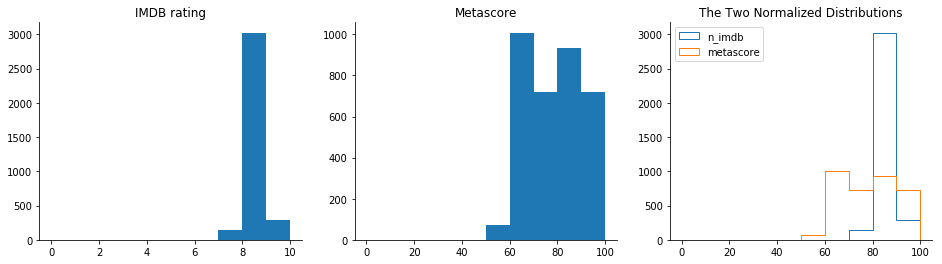

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()